<a href="https://colab.research.google.com/github/PhamHongQuan/diabetes-NB-FCNN/blob/main/Project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Project_ML'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Project_ML


In [ ]:
!pip install scikeras
!pip install tensorflow

  Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikeras 0.13.0 requires keras>=3.2.0, but you have keras 2.15.0 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, ClassifierMixin
from prettytable import PrettyTable
from tabulate import tabulate

In [ ]:
# Đọc dữ liệu từ file CSV
data = pd.read_csv('diabetes.csv')

# Chuẩn bị dữ liệu
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Hiển thị thông tin tổng quan về dữ liệu
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **Histogram**

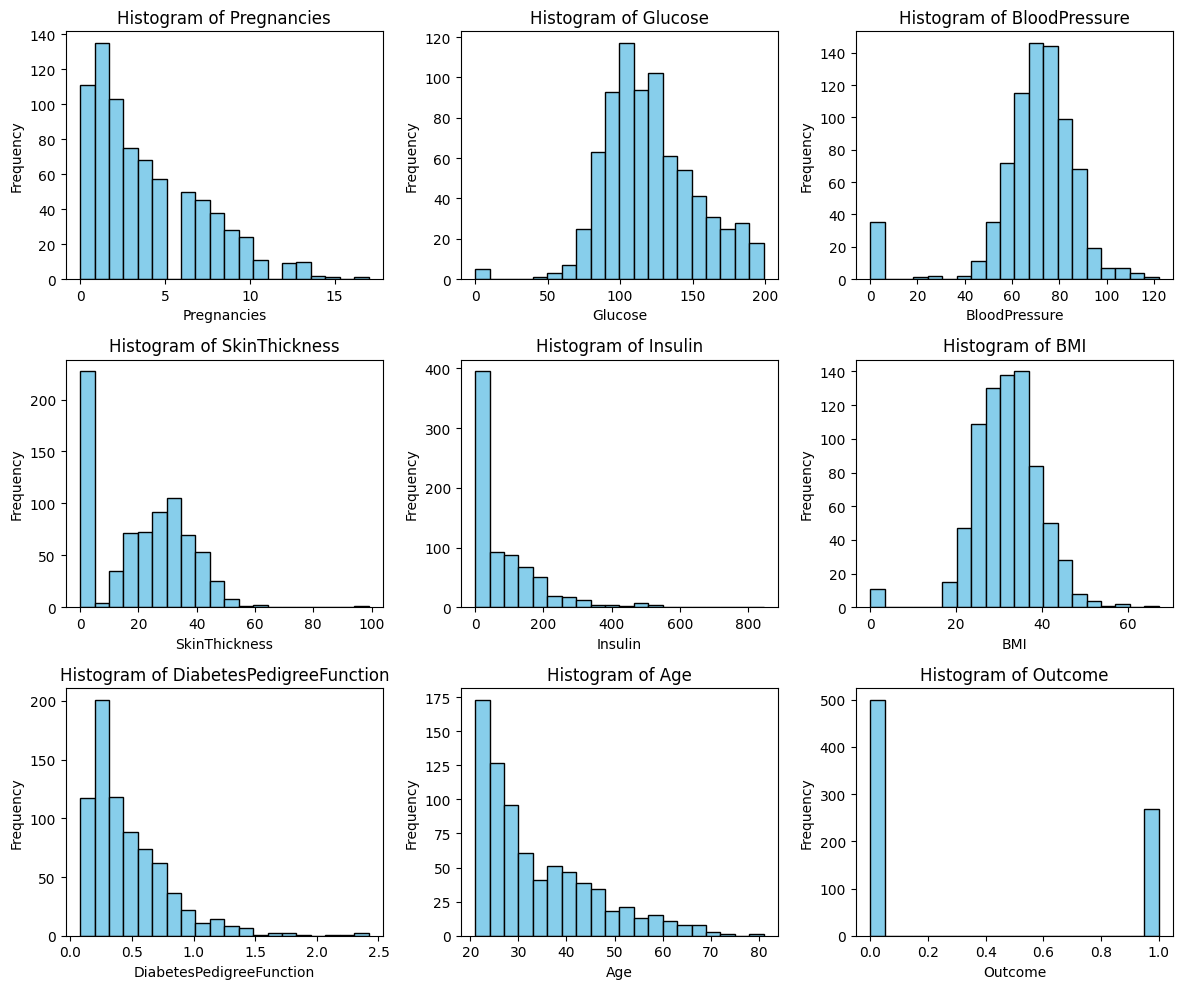

In [ ]:
# Vẽ histogram cho từng feature
plt.figure(figsize=(12, 10))
for i, column in enumerate(data.columns):
  plt.subplot(3, 3, i + 1)
  plt.hist(data[column], bins=20, edgecolor='black', color='skyblue')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()


# **Chuẩn hóa dữ liệu**

In [ ]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia dữ liệu thành tập train và tập test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# **Tiền xử lí dữ liệu**

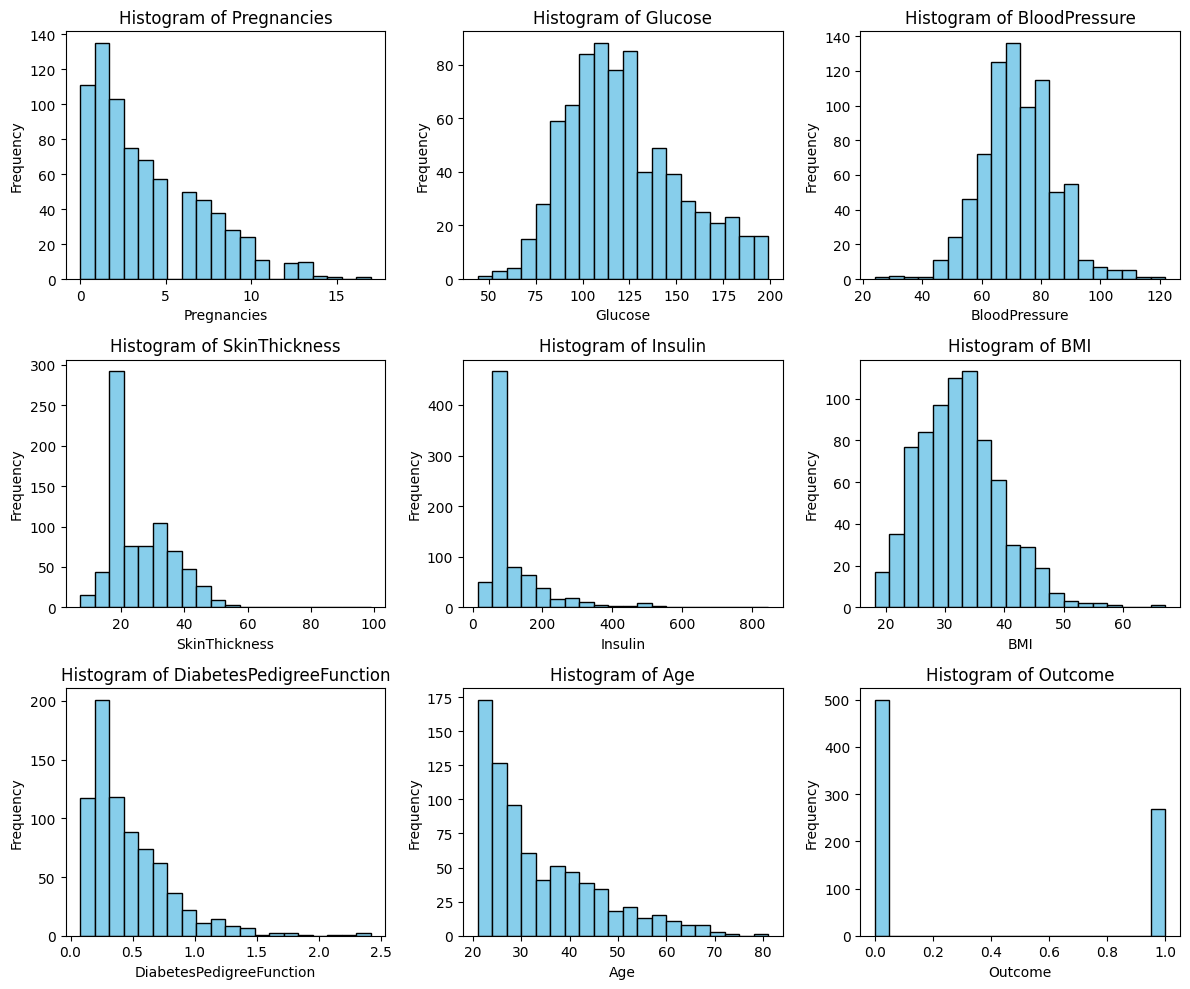

In [ ]:
# Thay thế các giá trị bằng 0 bằng giá trị trung bình của cột tương ứng (mean)
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())
data['BMI'] = data['BMI'].replace(0, data['BMI'].mean())

# Vẽ histogram cho từng feature sau khi tiền xử lí
plt.figure(figsize=(12, 10))
for i, column in enumerate(data.columns):
  plt.subplot(3, 3, i + 1)
  plt.hist(data[column], bins=20, edgecolor='black', color='skyblue')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()


# **GridSearchCV với Naive Bayes**

In [ ]:
# Định nghĩa param_grid cho GridSearchCV
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# Tạo GridSearchCV
grid_search = GridSearchCV(estimator=GaussianNB(),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5)

# Train GridSearchCV
grid_search.fit(X_train, y_train)

# Lấy ra các thông số tốt nhất từ GridSearchCV
best_params = grid_search.best_params_

print("Best Parameters:", best_params)

Best Parameters: {'var_smoothing': 0.08111308307896872}


# **Thuật toán Naive Bayes Gaussian**

5/5 [==============================] - 0s 3ms/step
+---+-----------+--------------------+
|   |  Metric   |    Naive Bayes     |
+---+-----------+--------------------+
| 0 | Accuracy  | 0.7662337662337663 |
| 1 | Precision | 0.6862745098039216 |
| 2 |  Recall   | 0.6363636363636364 |
| 3 | F1 Score  | 0.660377358490566  |
+---+-----------+--------------------+


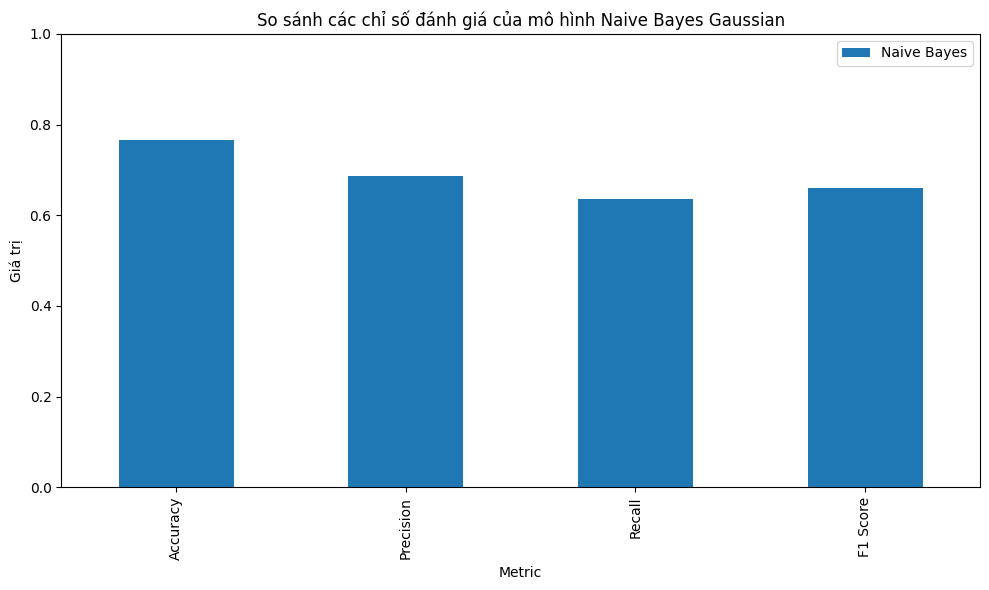

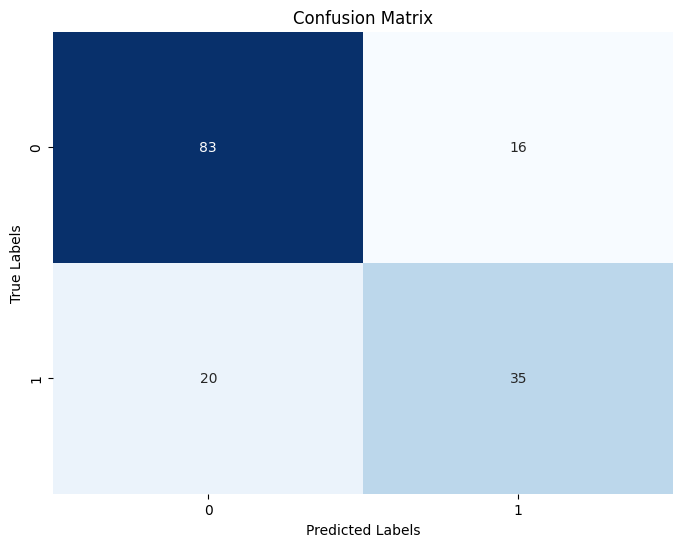

In [ ]:
# Tạo mô hình tốt nhất với các param đã tìm được
best_model = grid_search.best_estimator_

# Train mô hình
best_model.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred_best = best_model.predict(X_test)

# Đánh giá mô hình
accuracy_nb = accuracy_score(y_test, y_pred_best)
precision_nb = precision_score(y_test, y_pred_best)
recall_nb = recall_score(y_test, y_pred_best)
f1_nb = f1_score(y_test, y_pred_best)


# Tạo bảng so sánh
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision','Recall', 'F1 Score'],
    'Naive Bayes': [accuracy_nb, precision_nb, recall_nb, f1_nb]
})

# In bảng so sánh
print(tabulate(results, headers='keys', tablefmt='pretty'))

# Vẽ biểu đồ so sánh
results.plot(kind='bar', x='Metric', figsize=(10, 6))
plt.title('So sánh các chỉ số đánh giá của mô hình Naive Bayes Gaussian')
plt.ylabel('Giá trị')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Vẽ Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# **Fully Connected Layer**

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 199, in _get_response_values
    classes = estimator.classe

Best Parameters: {'batch_size': 32, 'epochs': 20}
5/5 [==============================] - 0s 3ms/step
+---+-----------+--------------------+
|   |  Metric   |       Value        |
+---+-----------+--------------------+
| 0 | Accuracy  | 0.7597402597402597 |
| 1 | Precision | 0.6730769230769231 |
| 2 |  Recall   | 0.6363636363636364 |
| 3 | F1 Score  | 0.6542056074766355 |
+---+-----------+--------------------+


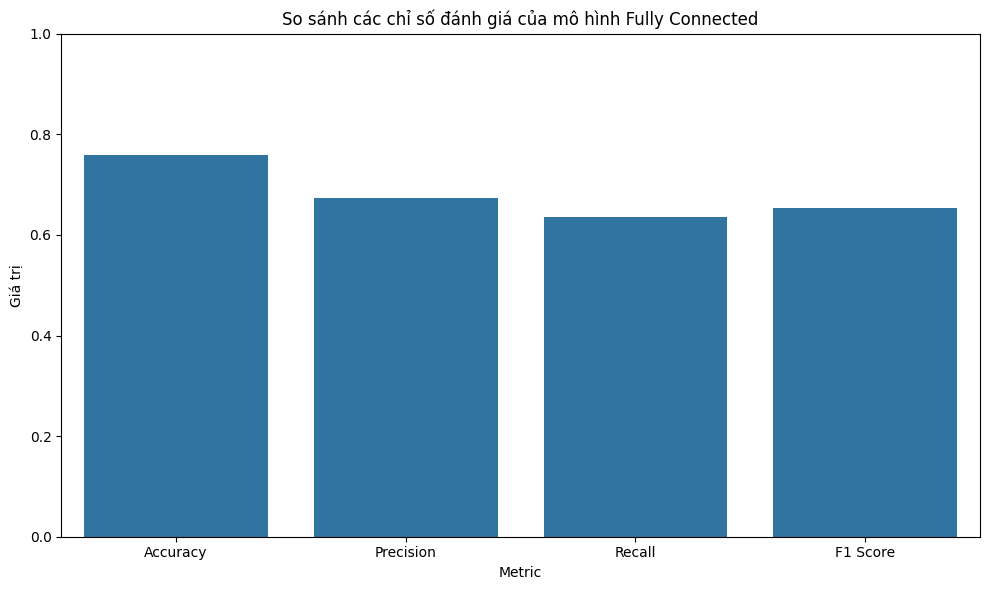

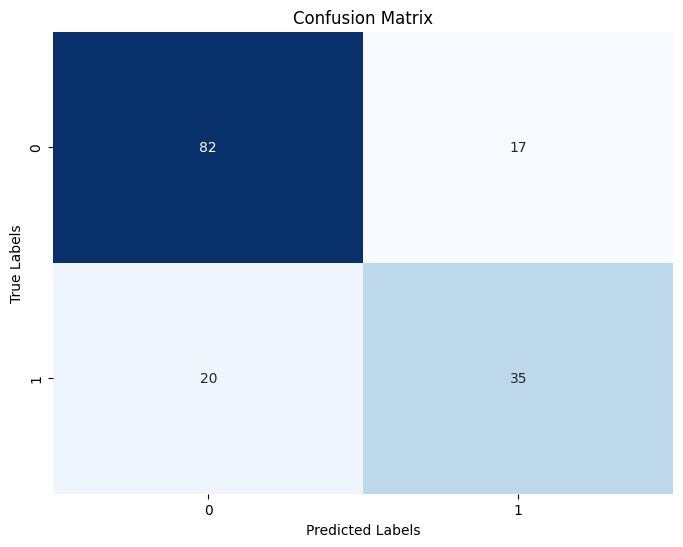

In [ ]:
# Tạo mô hình
def create_model(units=64, optimizer='adam'):
    model = Sequential([
        Dense(units, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(units // 2, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Custom wrapper cho mô hình Keras
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, create_model_fn=create_model, epochs=20, batch_size=32, verbose=0, **kwargs):
        self.create_model_fn = create_model_fn
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.kwargs = kwargs
        self.model = None

    def fit(self, X, y):
        self.model = self.create_model_fn(**self.kwargs)  # Adjust with default values
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)
        return self

    def predict(self, X):
        y_pred_prob = self.model.predict(X)
        y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)
        return y_pred

    def score(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)

# Định nghĩa các parameters
param_grid = {
    'epochs': [20],
    'batch_size': [32],
}

model = KerasClassifierWrapper()

grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=StratifiedKFold(n_splits=5),
                           verbose=1)
grid_search.fit(X_train, y_train)

print("===========================================================")
# In ra các parameters tốt nhất
print("Best Parameters:", grid_search.best_params_)

# Đánh giá mô hình trên tập test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy_fc = accuracy_score(y_test, y_pred)
precision_fc = precision_score(y_test, y_pred)
recall_fc = recall_score(y_test, y_pred)
f1_fc = f1_score(y_test, y_pred)

# Tạo bảng so sánh
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [accuracy_fc, precision_fc, recall_fc, f1_fc]
})

# In bảng so sánh
print(tabulate(results, headers='keys', tablefmt='pretty'))

# Vẽ biểu đồ so sánh
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', data=results)
plt.title('So sánh các chỉ số đánh giá của mô hình Fully Connected')
plt.ylabel('Giá trị')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Vẽ Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

So sánh 2 thuật toán

In [ ]:
# Tạo bảng thống kê
table = PrettyTable()
table.field_names = ["Metric", "Naive Bayes", "Fully Connected Layer"]
table.add_row(["Accuracy", accuracy_nb, accuracy_fc])
table.add_row(["Precision", precision_nb, precision_fc])
table.add_row(["Recall", recall_nb, recall_fc])
table.add_row(["F1 Score", f1_nb, f1_fc])

# In bảng kết quả đánh giá
print("Kết quả đánh giá của Naive Bayes và Fully Connected Layer:")
print(table)


Kết quả đánh giá của Naive Bayes và Fully Connected Layer:
+-----------+--------------------+-----------------------+
|   Metric  |    Naive Bayes     | Fully Connected Layer |
+-----------+--------------------+-----------------------+
|  Accuracy | 0.7662337662337663 |   0.7597402597402597  |
| Precision | 0.6862745098039216 |   0.6730769230769231  |
|   Recall  | 0.6363636363636364 |   0.6363636363636364  |
|  F1 Score | 0.660377358490566  |   0.6542056074766355  |
+-----------+--------------------+-----------------------+
